# Amazon Reviews Subset: Local Analysis

We're going to use Pandas to analyze a dataset and answer some basic questions about it that we could be asked in some sort of business context:

* What kind of reviews are the most helpful?
* Can we design a metric that allows us to rank reviews without people themselves saying if they are helpful?

# Load Data

In [1]:
!ls

Amazon Analysis.ipynb              Subset_reviews.csv
Introduction to Data Science.ipynb Untitled.ipynb
Lucy practice Analytics.ipynb      bigdata
Poloniex.ipynb                     chiweather.csv
Python Data Analytics.ipynb        my_random_csv.csv
README.md                          rdd.png
Review Analytics.ipynb             test.txt


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
file = 'Subset_reviews.csv'
a_reviews = pd.read_csv(file)

In [5]:
a_reviews.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


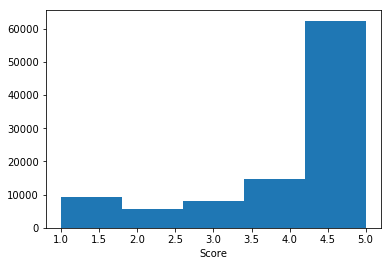

In [12]:
plt.hist(
    a_reviews['Score'],
    bins = 5  
    )
plt.xlabel('Score')
plt.show()

In [52]:
def our_hist(data, width=0.5):
    fig, ax = plt.subplots(figsize=(8,4.5))
    counts = np.bincount(data)
    min_val = np.min(data)
    max_val = np.max(data)
    
    plot_range = np.arange(min_val, max_val + 1)
    plt.bar(np.arange(len(counts)), counts)
    plt.xlim(min_val-width, max_val+width)
    return fig, ax

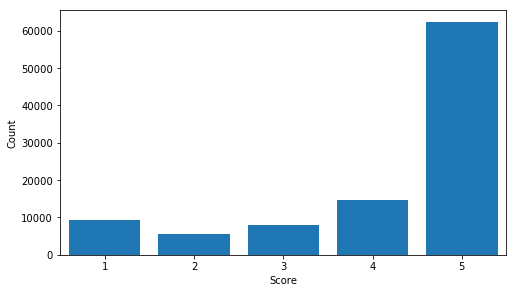

In [57]:
fig, ax = our_hist(a_reviews['Score'])
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

# How do we measure a good review?

The dataset contains real data related to who found a particular review helpful to read and who did not, so let's start by preprocessing this information into something readable and investigate any patterns we see as this might guide our hand towards further analysis. Making a plot an examining the distribution of some metric you are interested in always a good place to start as it generally reveals anomalies that might trip you up later and yields a better understanding of the dataset in general.

In [58]:
a_reviews['h_ratio'] = a_reviews['HelpfulnessNumerator'] / a_reviews['HelpfulnessDenominator']

In [59]:
a_reviews[['HelpfulnessNumerator', 'HelpfulnessDenominator', 'h_ratio']].head(10)

,HelpfulnessNumerator,HelpfulnessDenominator,h_ratio
0,1,1,1.0
1,0,0,NaN
2,1,1,1.0
3,3,3,1.0
4,0,0,NaN
5,0,0,NaN
6,0,0,NaN
7,0,0,NaN
8,1,1,1.0
9,0,0,NaN


Instantly we see a very common type of random issue when doing this type of analysis, invalid values and NaNs creeping into our business logic. At this point we need to decide what to do about these 0/0 cases. Some options:
* Fill those values with something like 0 or 1
* Filter the data completely so that 0/0 cases are removed

In [65]:
# Check the nan count
pd.isnull(a_reviews['h_ratio']).sum()

47717

In [66]:
a_reviews_no_null = a_reviews[~pd.isnull(a_reviews['h_ratio'])]

In [68]:
len(a_reviews_no_null)

52282

In [69]:
52282 + 47717

99999

In [67]:
a_reviews_no_null[['HelpfulnessNumerator', 'HelpfulnessDenominator', 'h_ratio']].head(10)

,HelpfulnessNumerator,HelpfulnessDenominator,h_ratio
0,1,1,1.0
2,1,1,1.0
3,3,3,1.0
8,1,1,1.0
10,1,1,1.0
11,4,4,1.0
12,1,1,1.0
13,2,2,1.0
14,4,5,0.8
15,4,5,0.8


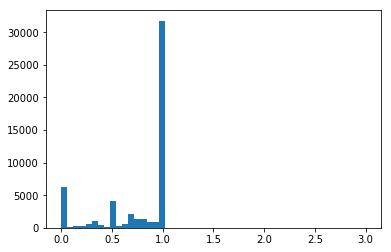

In [73]:
plt.hist(a_reviews_no_null['h_ratio'], bins=50)
plt.show()

What's going on here? Smells like a data issue of some sort...

In [74]:
np.max(a_reviews['h_ratio'])

3.0

In [76]:
a_reviews_no_null[a_reviews_no_null['h_ratio'] > 1.0].head(20)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,h_ratio
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...,1.5
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...,3.0


In [77]:
a_reviews_no_null = a_reviews_no_null[a_reviews_no_null['h_ratio'] <= 1.0]

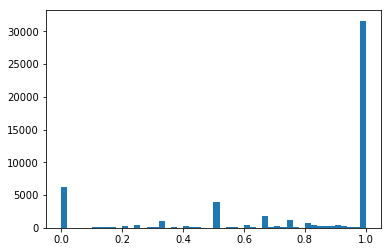

In [78]:
plt.hist(a_reviews_no_null['h_ratio'], bins=50)
plt.show()

The takeaways here are that there are three peaks:
* 0.0 - no one finds this review helpful
* 1.0 - everyone finds this review helpful
* 0.5 - what are the chances of this?

# Investigate the Logically Anomolous Data

In [79]:
split_reviews = a_reviews_no_null[a_reviews_no_null['h_ratio'] == 0.5]

In [83]:
split_reviews.head(100)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,h_ratio
47,48,B001EO5QW8,A26AY1TFK8BQXQ,"kbogo ""shoelover""",1,2,3,1200096000,Mushy,"The flavors are good. However, I do not see a...",0.5
48,49,B001EO5QW8,ALOR97KTZTK1P,knitty pants,1,2,4,1191715200,Very good but next time I won't order the Vari...,I really like the Maple and Brown Sugar flavor...,0.5
60,61,B004N5KULM,A1ZR8O62VSU4OK,"Lisa J. Szlosek ""lisa""",2,4,3,1318723200,Better price for this at Target,Watch your prices with this. While the assort...,0.5
204,205,B0028C44Z0,A2RMYCQIST622H,Dan,1,2,5,1322438400,"Love 'em, they're great!",The tiny Altoids are great for a quick breath ...,0.5
205,206,B0028C44Z0,A27D5IRAIGLOG5,Texan Gal,1,2,5,1271635200,Love these!,I loved these Wintergreen Altoid Smalls so muc...,0.5
276,277,B000LKZK7C,A1YZV2UY0QDZTX,"Loves to Cook ""Loves""",1,2,5,1253750400,Excellent!,Great service! Items arrived faster than expec...,0.5
360,361,B0041QJSJS,A2BAVWMHL130WY,Bruce L. Ishimatsu,2,4,5,1318723200,Treat yourself to the best coffee!,Go ahead and drink the other brands served at ...,0.5
502,503,B000G6RYNE,A3L4OZ0U0A5UDH,Linda Mullings,1,2,5,1349136000,Delicious!!,Perfect!! They are my favorite because I can s...,0.5
503,504,B000G6RYNE,A2OEUROGZDTXUJ,J. Graves,1,2,4,1327968000,I like them.,"Amazon's suggestion for a 4 star review is ""I ...",0.5
504,505,B000G6RYNE,A30H2335OM7RD6,"apoem ""apoem""",1,2,5,1316649600,Love Kettle Chips,These are a favorite at our home. We like the ...,0.5


In [82]:
# validate the operation
np.unique(split_reviews['h_ratio'])

array([ 0.5])

# Your Choices as an Analyst

We need to make a decision here. One could argue that the nature of these samples causes them not to necessarily contribute much to the analysis. In some sense we're really just interested in the mature reviews, as the more people who rate the review the more sure we are if it really is helpful or not. We need to go back to the original dataset and define some metric for review maturity that gets us more relible results. This is a good example of how you end up having to make somewhat arbitrary business decisions that really do affect outcomes based on your domain expertise and prior research. Optimizing numbers like this is one of the hardest things about being a data scientist.

In [110]:
np.bincount(a_reviews['HelpfulnessDenominator'])[:50]

array([47717, 19919, 10970,  5983,  3950,  2577,  1787,  1306,   878,
         769,   614,   496,   357,   320,   262,   252,   178,   158,
         140,   107,   112,    80,    88,    71,    66,    62,    59,
          54,    32,    35,    31,    35,    20,    37,    15,    36,
          24,    16,     9,    12,    11,    19,    14,    10,     9,
          12,     4,    13,     8,    14])

In [121]:
cutoff = 5

In [122]:
a_reviews_mature = a_reviews[a_reviews['HelpfulnessDenominator'] >= cutoff]

In [123]:
len(a_reviews_mature)

11460

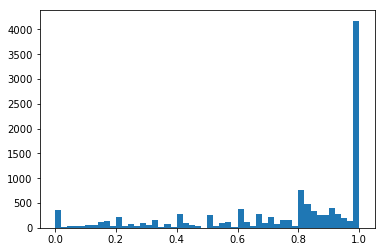

In [124]:
plt.hist(a_reviews_mature['h_ratio'], bins=50)
plt.show()

# Let's search for some things that might be related to h_ratio

In [125]:
a_reviews_mature.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,h_ratio
14,15,B001GVISJM,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",4,5,5,1268352000,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...,0.8
15,16,B001GVISJM,A1CZX3CP8IKQIJ,Brian A. Lee,4,5,5,1262044800,"Lots of twizzlers, just what you expect.",My daughter loves twizzlers and this shipment ...,0.8
32,33,B001EO5QW8,AOVROBZ8BNTP7,S. Potter,19,19,4,1163376000,Best of the Instant Oatmeals,McCann's Instant Oatmeal is great if you must ...,1.0
33,34,B001EO5QW8,A3PMM0NFVEJGK9,"Megan ""Bad at Nicknames""",13,13,4,1166313600,Good Instant,This is a good instant oatmeal from the best o...,1.0
34,35,B001EO5QW8,A2EB6OGOWCRU5H,CorbyJames,9,9,5,1175212800,Great Irish oatmeal for those in a hurry!,Instant oatmeal can become soggy the minute th...,1.0


We're going to try and come up with a strategy that allows us to rank reviews by how helpful we think they are, without using the actual h_ratio itself. This is because we always want to try and show customers the most helpful reviews first, and sometimes they might not be mature enough yet to have actual ratings from humans. So we're going to use our existing data to try and come up with a way of predicting the helpfulness ratio based on the other data.

# Checking if something is useful for determining something else

Let's create some basic features from our text fields and plot out their relationship to the thing we're trying to predict. Intuitively variable A could be called useful for determining variable B else if there's some pattern where higher or lower values of A and B occur more frequently together. Scatterplots help us visualize this type of thing.

In [126]:
data = a_reviews_mature

In [127]:
data['len_reviews'] = data['Text'].apply(lambda s: len(s))

/Users/brandon/installs/anaconda/install/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [128]:
data[['Text', 'len_reviews']].head()

,Text,len_reviews
14,The Strawberry Twizzlers are my guilty pleasur...,113
15,My daughter loves twizzlers and this shipment ...,155
32,McCann's Instant Oatmeal is great if you must ...,1099
33,This is a good instant oatmeal from the best o...,481
34,Instant oatmeal can become soggy the minute th...,537


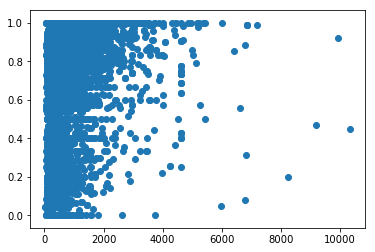

In [129]:
plt.scatter(data['len_reviews'], data['h_ratio'])
plt.show()

In [131]:
np.corrcoef(data['len_reviews'], data['h_ratio'])

array([[ 1.        ,  0.11895768],
       [ 0.11895768,  1.        ]])